In [1]:
import numpy.random as rand
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def computCost(X, theta, y, lamda):
    J = 0
    m = np.size(y, 0) * np.size(y, 1)
    J = np.sum( np.sum( ( np.matmul( X, np.transpose(theta) ) - y )**2 ) / (2 * m)) + lamda * np.sum(theta[:, -1:0:-1]) / (2 * m) + lamda * np.sum(X[:, -1:0:-1])  / (2 * m)  
    return J

In [7]:
print('visualization of Data...')
a = np.array([[5.,5.,0.,5.,5.],[0.,0.,0.,5.,5.],[5.,5.,0.,0.,0.],[5.,0.,5.,0.,5.],[0.,5.,5.,5.,0.]]) # Training data
print(a)

#Gen fitures
x = np.random.sample((4, 5))
theta = np.random.sample((4, 5))
x = np.vstack((np.ones((1, 5)), x))
theta = np.vstack((np.ones((1, 5)), theta))

x  = np.transpose(x)
theta = np.transpose(theta)

print('visualization of parameters x...')
print (x)
print('visualization of parameters theta...')
print (theta)

# useful parametrs
lamda = 1
alpfa = 0.01
step = 100
swaps = 10


visualization of Data...
[[5. 5. 0. 5. 5.]
 [0. 0. 0. 5. 5.]
 [5. 5. 0. 0. 0.]
 [5. 0. 5. 0. 5.]
 [0. 5. 5. 5. 0.]]
visualization of parameters x...
[[1.         0.53531094 0.68251083 0.02743695 0.01106885]
 [1.         0.03673483 0.49223336 0.32158759 0.95501217]
 [1.         0.9793359  0.18351985 0.78921039 0.38579862]
 [1.         0.21072254 0.82730582 0.51036304 0.12966096]
 [1.         0.65492939 0.82533606 0.19195036 0.10875077]]
visualization of parameters theta...
[[1.         0.40651833 0.4217751  0.16144896 0.96029975]
 [1.         0.30189644 0.82963611 0.83717236 0.83067475]
 [1.         0.34420246 0.84622407 0.14835771 0.15650577]
 [1.         0.71702353 0.92407293 0.47673329 0.53171078]
 [1.         0.37261419 0.46388292 0.14238477 0.31022606]]


3.993476225731536
Predicting...
[[5. 5. 0. 5. 5.]
 [0. 0. 0. 5. 5.]
 [5. 5. 0. 0. 0.]
 [5. 0. 5. 0. 5.]
 [0. 5. 5. 5. 0.]]
accurancy...
100.0
plot cost history...


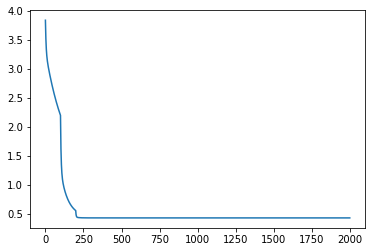

In [8]:
#initial val
initialCost = computCost(x, theta, a, lamda) 
print(initialCost)

history = np.zeros((1, 1000000))
i = 0;
# Start Colab. filtering
for k in range(0, swaps):
    for  v in range(0, step):
        Grad_x = np.matmul((np.matmul(x, np.transpose(theta)) - a), theta)
        x = x - alpfa * Grad_x
        history[0, i] = computCost(x, theta, a, lamda)
        i += 1
        #print(computCost(x, theta, a, lamda))
    for  v in range(0, step):
        Grad_theta = np.matmul(np.transpose((np.matmul(x, np.transpose(theta)) - a)), x)
        theta = theta - alpfa * Grad_theta
        history[0, i] = computCost(x, theta, a, lamda)
        i += 1
        #print(computCost(x, theta, a, lamda))
        


#predict
print("Predicting...")
Pred = np.matmul(x, np.transpose(theta))
Pred = np.abs(np.round(Pred, 1))

print(Pred)
#accurancy
print('accurancy...')
print(np.average(np.array_equal(Pred, a)) * 100)

#checking
print("plot cost history...")
plt.plot(range(0, i), history[0, range(0, i)])